In [1]:
import numpy as np
from sklearn.datasets import load_iris

In [2]:
# 행렬 shape 그대로 출력하게 하기
input_x = np.random.randn(3,2)

In [3]:
t = np.array(['monkey','cat','dog'])
t = [[0],[1],[2]]
t = np.array([[0],[1],[2]]) 
t = np.array([[1,0,0],[0,1,0],[0,0,1]])

In [4]:
w = np.random.randn(2,1)
output = np.dot(input_x,w)
w = np.random.randn(2,3) # 2X3으로 행렬이 가야한다
output = np.dot(input_x,w)

In [5]:
def softmax(x):
    x = x - np.max(x,axis=1).reshape(-1,1)
    return np.exp(x)/np.sum(np.exp(x),axis=1).reshape(-1,1)
np.sum(softmax(output),axis=1)

array([1., 1., 1.])

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
np.sum(sigmoid(output),axis=1)

array([1.72260299, 0.9326641 , 0.48769884])

In [7]:
def relu(x):
    return np.maximum(0,x)
np.sum(relu(output),axis=1)

array([1.72771419, 0.        , 0.        ])

In [8]:
def loss(y,t):
    return -np.sum(np.log(y) * t)/y.shape[0]
loss(softmax(output),t)

1.7826139307290534

In [9]:
def cross_entropy_error(y,t):
    return -np.sum(t*np.log(y))/y.shape[0] 
cross_entropy_error(softmax(output),t)

1.7826139307290534

In [10]:
class Network:
    def __init__(self):
        self.W = np.random.randn(2,2)
        self.b = np.random.randn(2)
    
    def predict(self,x):
        return np.dot(x,self.W) + self.b
    
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        return loss

In [11]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    if x.ndim == 2:
        for i in range(grad.shape[0]):
            for j in range(grad.shape[1]):
                fx = f(x[i,j])
                tmp_val = x[i,j]
                x[i,j] = tmp_val + h
                fxh = f(x[i,j])
                grad[i,j] = (fxh-fx)/h
                x[i,j] = tmp_val
        return grad
    else: 
        for i in range(x.size):
            tmp_val = x[i]
            x[i] = tmp_val + h
            fxh1 = f(x[i])
            x[i] = tmp_val - h
            fxh2 = f(x[i])
            grad[i] = (fxh1-fxh2)/2*h
            x[i] = tmp_val    
        return grad
    
f = lambda x :x**2
numerical_gradient(f,np.array([1.,2.,3.]))

array([2.e-08, 4.e-08, 6.e-08])

In [12]:
class TwoLayerNet: #네트워크 초기화
    def __init__(self,input_size,hidden_size,output_size): #결정해서 들어갈거임
        self.W = {}
        self.W['W1'] = np.random.randn(input_size,hidden_size)
        self.W['b1'] = np.random.randn(hidden_size)
        self.W['W2'] = np.random.randn(hidden_size,output_size) #두개니깐 여기서 끝
        self.W['b2'] = np.random.randn(output_size)
        self.loss_val = []
    
    def predict(self,x):
        W1 = self.W['W1']
        W2 = self.W['W2']
        b1 = self.W['b1']
        b2 = self.W['b2']
        
        a1 = np.dot(x,W1) + b1 #첫번쨰 출력값
        z1 = relu(a1) #활성화
        a2 = np.dot(z1,W2) + b2 #활성화 된 값을 가져와 출력
        out = softmax(a2) #이것을 출력
        return out
    
    def loss(self,x,t):
        y = self.predict(x)
        loss = cross_entropy_error(y,t)
        return loss

    def numerical_gradient(self,x,t):
        f = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(f, self.W['W1'])
        grads['b1'] = numerical_gradient(f, self.W['b1'])
        grads['W2'] = numerical_gradient(f, self.W['W2'])
        grads['b2'] = numerical_gradient(f, self.W['b2'])
        
        return grads

    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        acc = sum(y == t)/x.shape[0]
        return acc
    
    def train(self,epochs,lr,x,t):
        for epoch in range(epochs):
            grads = self.numerical_gradient(x,t)
            for key in grads.keys():
                self.W[key] -= lr*grads[key]
            self.loss_val.append(self.loss(x,t))
        

In [27]:
X = load_iris()['data']
y = load_iris()['target']
t = np.zeros((y.size,np.unique(y).size))
for i in range(len(t)):
    t[i,y[i]] = 1
input_size = X.shape[1]
hidden_size = 5
output_size = t.shape[1]
network = TwoLayerNet(input_size=input_size,hidden_size=hidden_size,output_size=output_size)

In [28]:
network.accuracy(X,t)

0.3333333333333333

In [29]:
network.train(100000,1e-3,X,t)

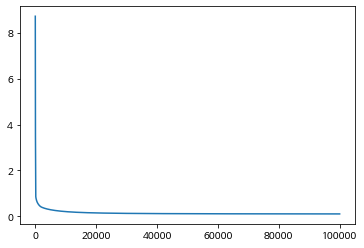

In [32]:
import matplotlib.pyplot as plt
plt.plot(np.arange(100000),network.loss_val)

In [17]:
from sklearn.model_selection import train_test_split
X = load_iris()['data']
y = load_iris()['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

t_train = np.zeros((y_train.size,np.unique(y_train).size))
for i in range(len(t_train)):
    t_train[i,y_train[i]] = 1
t_test = np.zeros((y_test.size,np.unique(y_test).size))
for i in range(len(t_test)):
    t_test[i,y_test[i]] = 1
    
input_size = X_train.shape[1]
hidden_size = 5
output_size = t_train.shape[1]
network = TwoLayerNet(input_size=input_size,hidden_size=hidden_size,output_size=output_size)

In [18]:
network.train(10000,1e-3,X_test,t_test)

In [19]:
network.accuracy(X_test,t_test)

0.9666666666666667

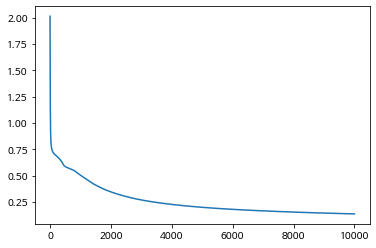

In [20]:
plt.plot(np.arange(len(network.loss_val)),network.loss_val)